Importing and Cleaning

Github Link: https://github.com/ethanperl/DAT350-MiniProjects

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

rawTravelDF = pd.read_csv("interstellar_travel.csv")

In [48]:
rawTravelDF.head()

,Age,Gender,Occupation,Travel Class,Destination,Star System,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Purpose of Travel,Transportation Type,Price (Galactic Credits),Booking Date,Departure Date,Special Requests,Loyalty Program Member,Month,Customer Satisfaction Score
0,14,Female,Colonist,Business,Gliese 581,Cunningham Mountains,1.09,11.0,5,Tourism,Warp Drive,828.949275,2023-09-17,2025-01-07,Other,No,9,105.0
1,22,Male,Tourist,Economy,Alpha Centauri,Hayes Trace,5.70,23.0,0,Research,Solar Sailing,488.469135,2023-03-31,2025-12-26,Other,No,3,102.0
2,62,Female,Businessperson,Luxury,Alpha Centauri,Anna Port,0.37,4.0,1,Tourism,Ion Thruster,183.745881,2022-05-19,2025-01-04,NaN,Yes,5,100.0
3,21,Female,Colonist,Economy,Lalande 21185,Henry Ville,0.32,23.0,1,Tourism,Warp Drive,358.754000,2023-04-13,2024-02-09,NaN,No,4,108.0
4,42,Male,Explorer,Luxury,Exotic Destination 10,Graves Mall,6.17,42.0,1,Colonization,Ion Thruster,3073.759920,2023-06-12,2024-03-15,Special Meal,No,6,97.0


In [49]:
filtTravelDF = rawTravelDF.drop(columns= [ 'Booking Date', 'Departure Date', 'Special Requests', 'Loyalty Program Member', 'Destination', 'Star System'])

In [50]:
filtTravelDF.head()

,Age,Gender,Occupation,Travel Class,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Purpose of Travel,Transportation Type,Price (Galactic Credits),Month,Customer Satisfaction Score
0,14,Female,Colonist,Business,1.09,11.0,5,Tourism,Warp Drive,828.949275,9,105.0
1,22,Male,Tourist,Economy,5.70,23.0,0,Research,Solar Sailing,488.469135,3,102.0
2,62,Female,Businessperson,Luxury,0.37,4.0,1,Tourism,Ion Thruster,183.745881,5,100.0
3,21,Female,Colonist,Economy,0.32,23.0,1,Tourism,Warp Drive,358.754000,4,108.0
4,42,Male,Explorer,Luxury,6.17,42.0,1,Colonization,Ion Thruster,3073.759920,6,97.0


In [51]:
filtTravelDF.isna().sum()

Age                                      0
Gender                                   0
Occupation                               0
Travel Class                             0
Distance to Destination (Light-Years)    0
Duration of Stay (Earth Days)            0
Number of Companions                     0
Purpose of Travel                        0
Transportation Type                      0
Price (Galactic Credits)                 0
Month                                    0
Customer Satisfaction Score              0
dtype: int64

In [52]:
filtTravelDF = filtTravelDF.rename(columns={'Distance to Destination (Light-Years)' : 'Distance', 'Duration of Stay (Earth Days)' : 'Duration', 'Number of Companions' : 'Companions'})

Percentages of Categorical Features

In [71]:
averageSatisfactionScore = filtTravelDF['Customer Satisfaction Score'].mean()
averageSatisfactionScore

101.66011240613038

In [74]:
medianSatisfactionScore = filtTravelDF['Customer Satisfaction Score'].median()
medianSatisfactionScore

102.0

In [72]:
maxSatisfactionScore = filtTravelDF['Customer Satisfaction Score'].max()
maxSatisfactionScore

115.0

In [73]:
minSatisfactionScore = filtTravelDF['Customer Satisfaction Score'].min()
minSatisfactionScore

32.25

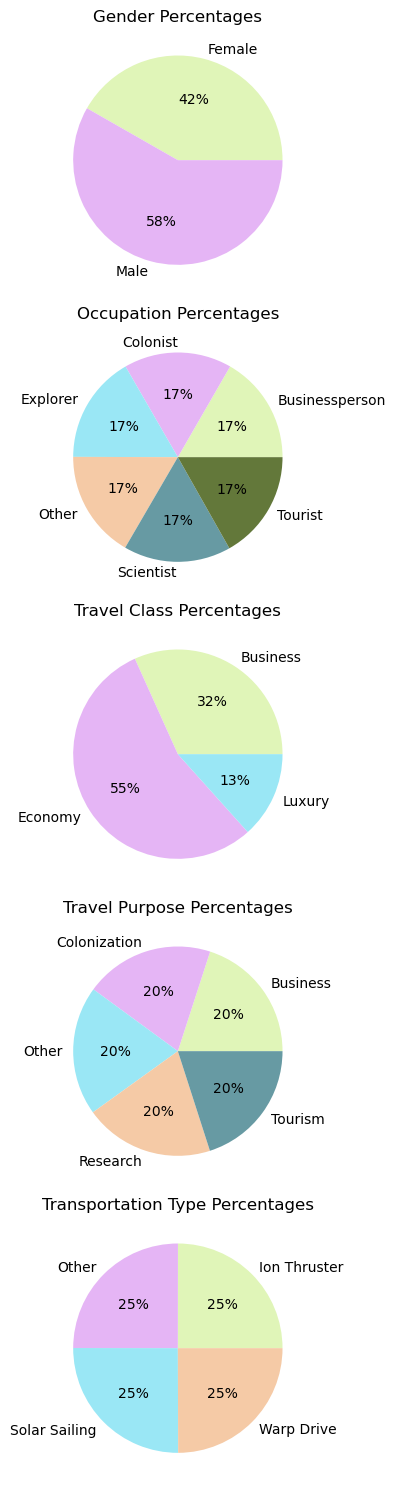

In [53]:
## percentages of features
fig, axs = plt.subplots(5, figsize=(15, 15))

colors = ['#E0F5B8', '#E5B5F5', '#9AE7F5', '#F5CAA6', '#679AA3', '#63783A']

##gender
genderGroup = filtTravelDF.groupby('Gender').size()

axs[0].pie(x=genderGroup, 
           labels=genderGroup.index, 
           autopct = '%1.00f%%', colors= colors)
axs[0].set_title('Gender Percentages')

##occupation
occGroup = filtTravelDF.groupby('Occupation').size()

axs[1].pie(x=occGroup, 
           labels=occGroup.index, 
           autopct = '%1.00f%%', colors= colors)
axs[1].set_title('Occupation Percentages')

##class
classGroup = filtTravelDF.groupby('Travel Class').size()

axs[2].pie(x=classGroup, 
           labels=classGroup.index, 
           autopct = '%1.00f%%', colors= colors)
axs[2].set_title('Travel Class Percentages')


##purpose
purposeGroup = filtTravelDF.groupby('Purpose of Travel').size()

axs[3].pie(x=purposeGroup, 
           labels=purposeGroup.index, 
           autopct = '%1.00f%%', colors= colors)
axs[3].set_title('Travel Purpose Percentages')


##transport
transportGroup = filtTravelDF.groupby('Transportation Type').size()

axs[4].pie(x=transportGroup, 
           labels=transportGroup.index, 
           autopct = '%1.00f%%', colors= colors)
axs[4].set_title('Transportation Type Percentages')

plt.tight_layout()



Distribution of Ordinal Values

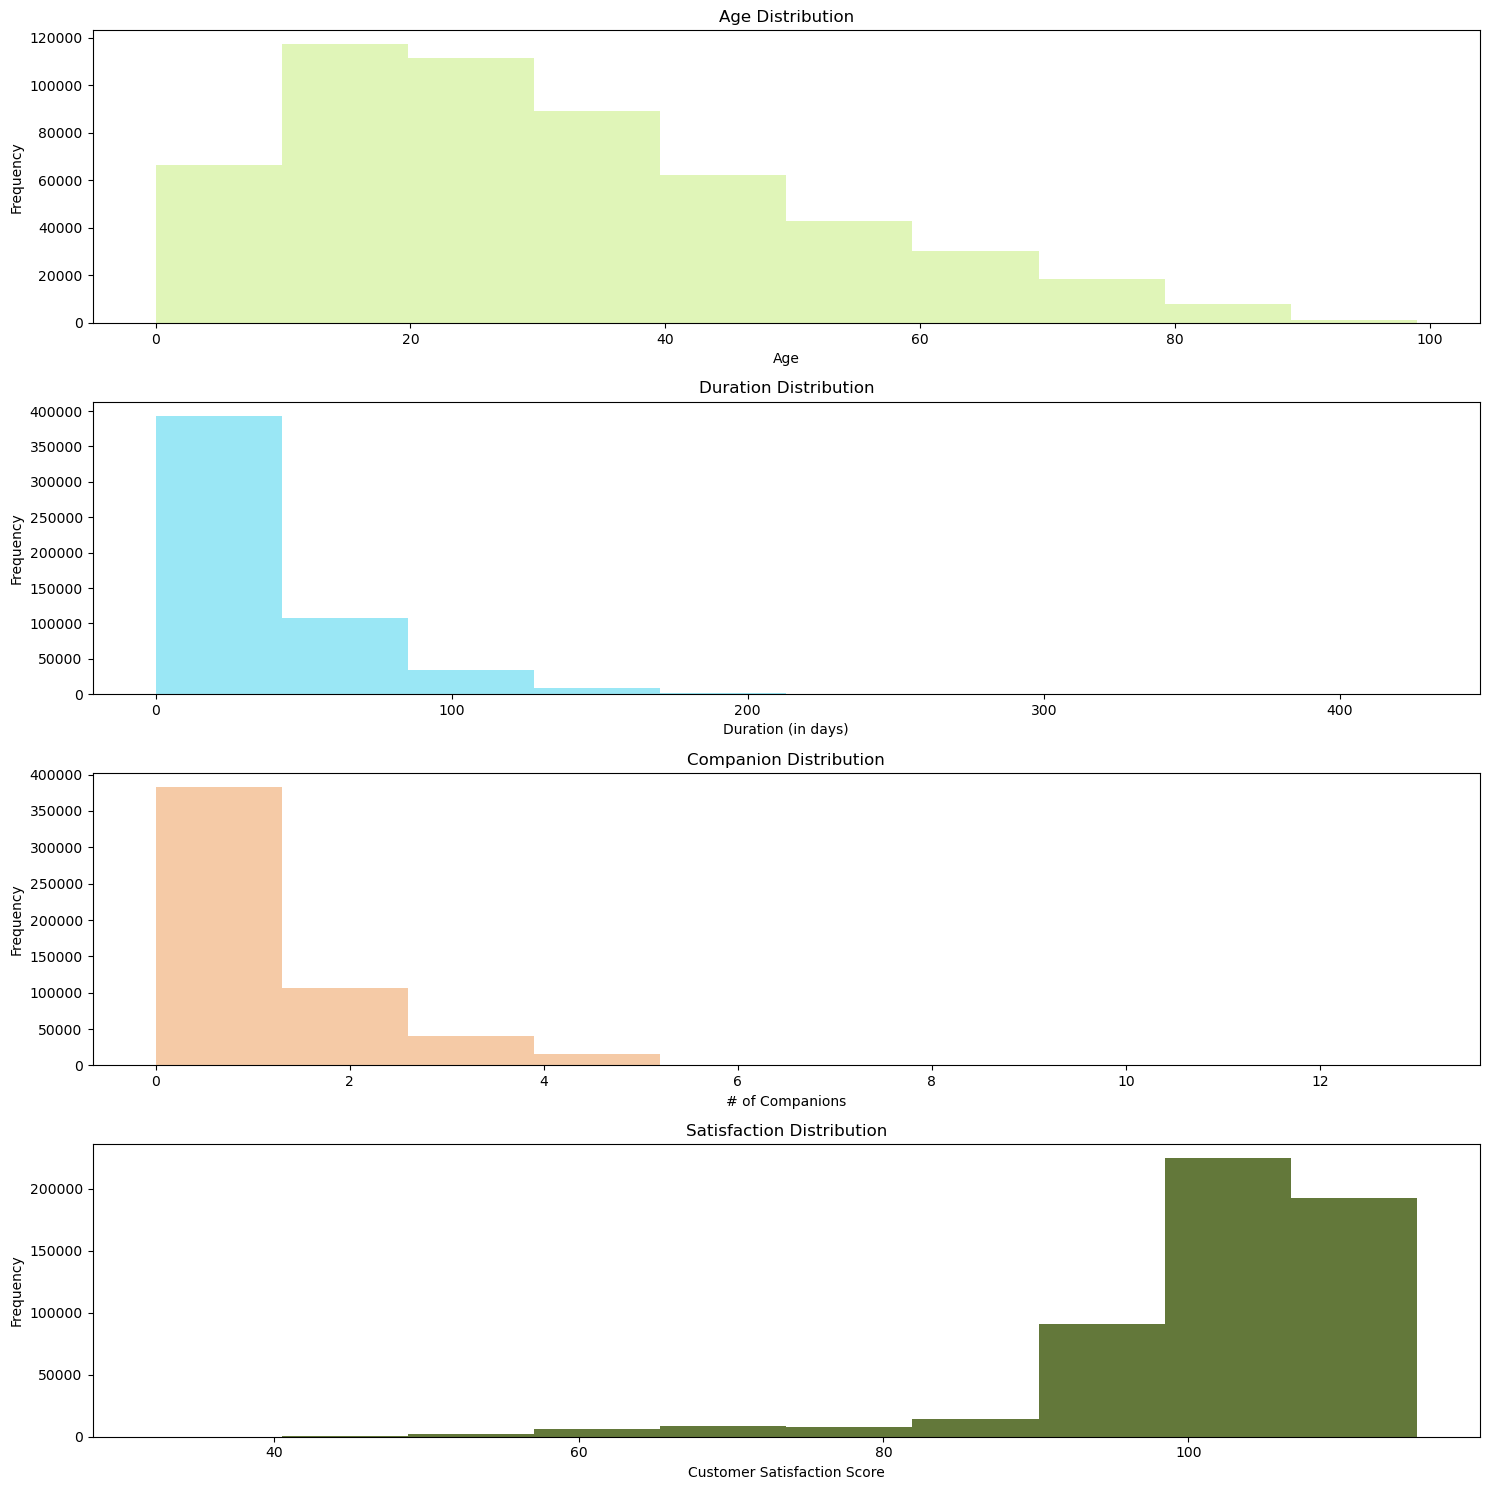

In [54]:
## distribution of features
fig, axs = plt.subplots(4, figsize=(15, 15))

##age 
axs[0].hist(x=filtTravelDF['Age'], color = '#E0F5B8' )
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Age Distribution")

##Duration (in days)
axs[1].hist(x=filtTravelDF['Duration'], color = '#9AE7F5' )
axs[1].set_xlabel("Duration (in days)")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Duration Distribution")

##Companions
axs[2].hist(x=filtTravelDF['Companions'], color = '#F5CAA6' )
axs[2].set_xlabel("# of Companions")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Companion Distribution")

##Customer Satisfaction Score
axs[3].hist(x=filtTravelDF['Customer Satisfaction Score'], color = '#63783A' )
axs[3].set_xlabel("Customer Satisfaction Score")
axs[3].set_ylabel("Frequency")
axs[3].set_title("Satisfaction Distribution")


plt.tight_layout()

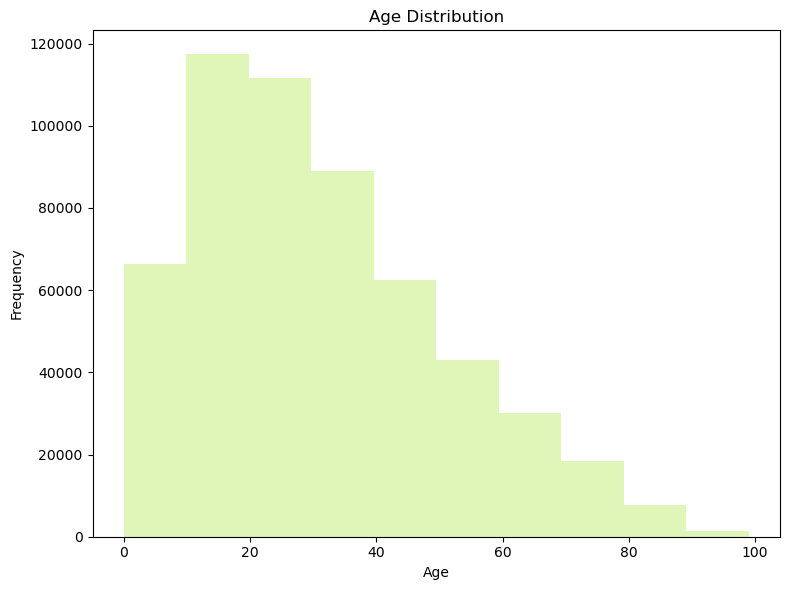

In [80]:
##Age Distribution
plt.figure(figsize=(8, 6))
plt.hist(x=filtTravelDF['Age'], color='#E0F5B8')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.tight_layout()

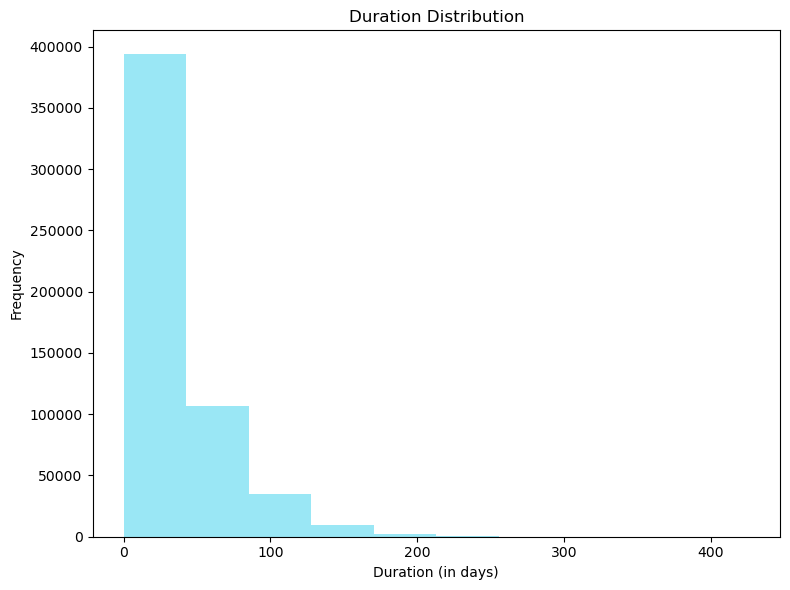

In [79]:
##Duration Distribution
plt.figure(figsize=(8, 6))
plt.hist(x=filtTravelDF['Duration'], color='#9AE7F5')
plt.xlabel("Duration (in days)")
plt.ylabel("Frequency")
plt.title("Duration Distribution")
plt.tight_layout()

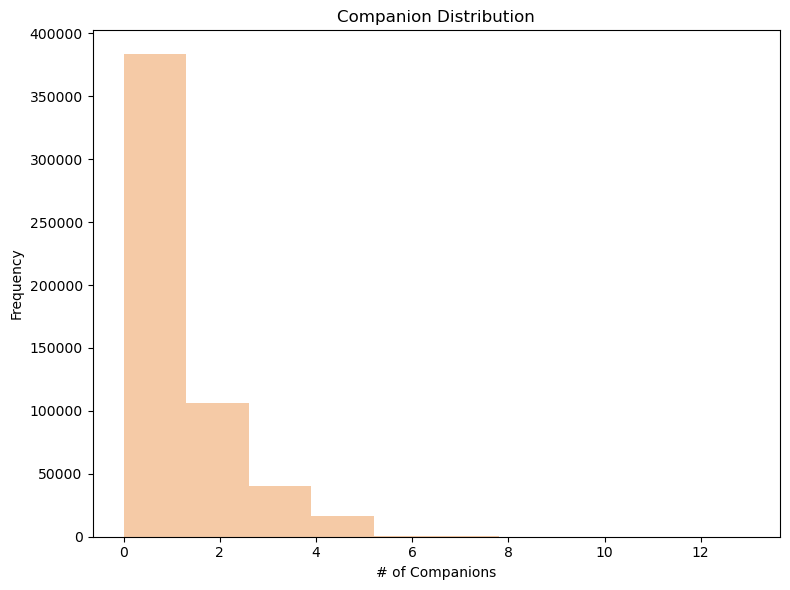

In [78]:
##Companion Distribution
plt.figure(figsize=(8, 6))
plt.hist(x=filtTravelDF['Companions'], color='#F5CAA6')
plt.xlabel("# of Companions")
plt.ylabel("Frequency")
plt.title("Companion Distribution")
plt.tight_layout()

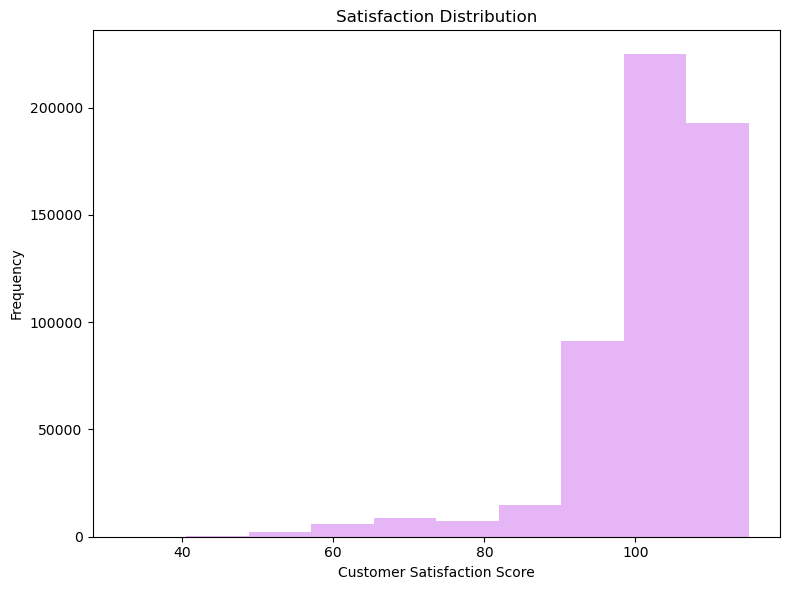

In [81]:
##Customer Satisfaction Score Distribution
plt.figure(figsize=(8, 6))
plt.hist(x=filtTravelDF['Customer Satisfaction Score'], color='#E5B5F5')
plt.xlabel("Customer Satisfaction Score")
plt.ylabel("Frequency")
plt.title("Satisfaction Distribution")
plt.tight_layout()

Indepth Analysis

Text(0.5, 1.0, 'Effect of Price on Customer Satisfaction')

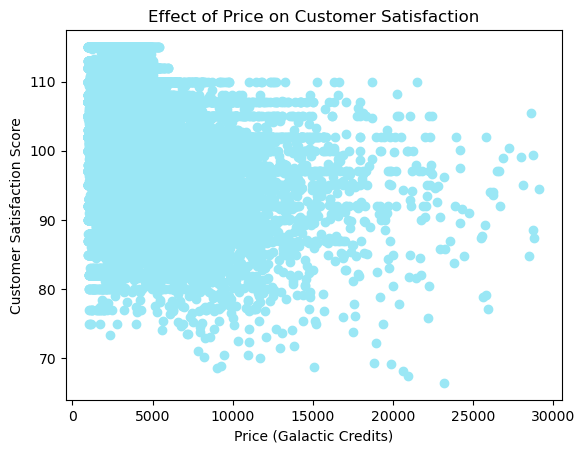

In [55]:
## Price vs customer satisfaction
filt_price_data = filtTravelDF[(filtTravelDF['Price (Galactic Credits)'] < 30000) &
                             (filtTravelDF['Price (Galactic Credits)'] > 1000)]

plt.scatter(x= filt_price_data['Price (Galactic Credits)'], 
            y=filt_price_data['Customer Satisfaction Score'], color= '#9AE7F5')

plt.xlabel('Price (Galactic Credits)')
plt.ylabel('Customer Satisfaction Score')
plt.title('Effect of Price on Customer Satisfaction')


ChatGPT Citation for below:

Prompt: I have a scatter plot and want to color the observations by travel class.

Answer:

#Iterate over unique travel class values
for travel_class in filt_price_data['Travel Class'].unique():
    #Filter data for the current travel class
    class_data = filt_price_data[filt_price_data['Travel Class'] == travel_class]

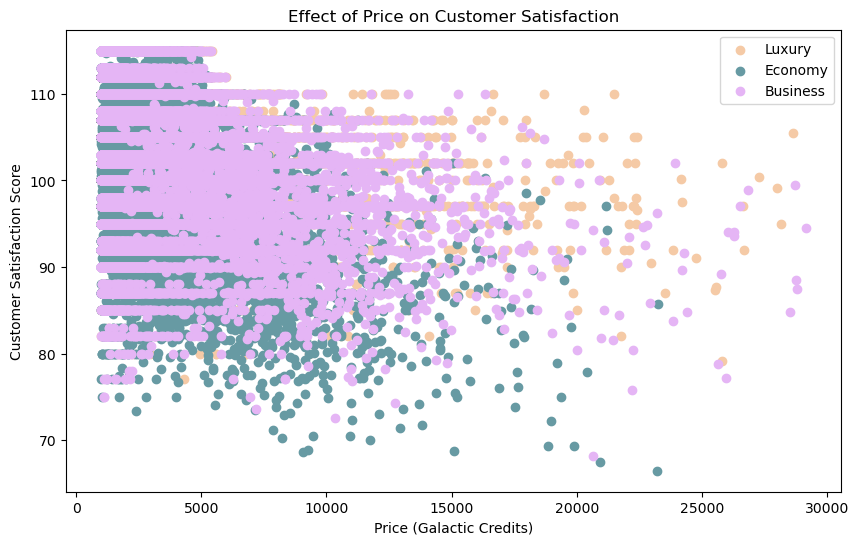

In [83]:
##satisfaction by price by class
class_colors = {'Economy': '#679AA3', 'Luxury': '#F5CAA6', 'Business': '#E5B5F5'}

colors = ['#E0F5B8', '#E5B5F5', '#9AE7F5', '#F5CAA6', '#679AA3', '#63783A']

plt.figure(figsize=(10, 6))

# Iterate over unique travel class values
for travel_class in filt_price_data['Travel Class'].unique():
    # Filter data for the current travel class
    class_data = filt_price_data[filt_price_data['Travel Class'] == travel_class]
    
    plt.scatter(x=class_data['Price (Galactic Credits)'],
                y=class_data['Customer Satisfaction Score'],
                color=class_colors[travel_class],
                label=travel_class)

plt.xlabel('Price (Galactic Credits)')
plt.ylabel('Customer Satisfaction Score')
plt.title('Effect of Price on Customer Satisfaction')

plt.legend()

Text(0.5, 1.0, 'Effect of Month on Customer Satisfaction')

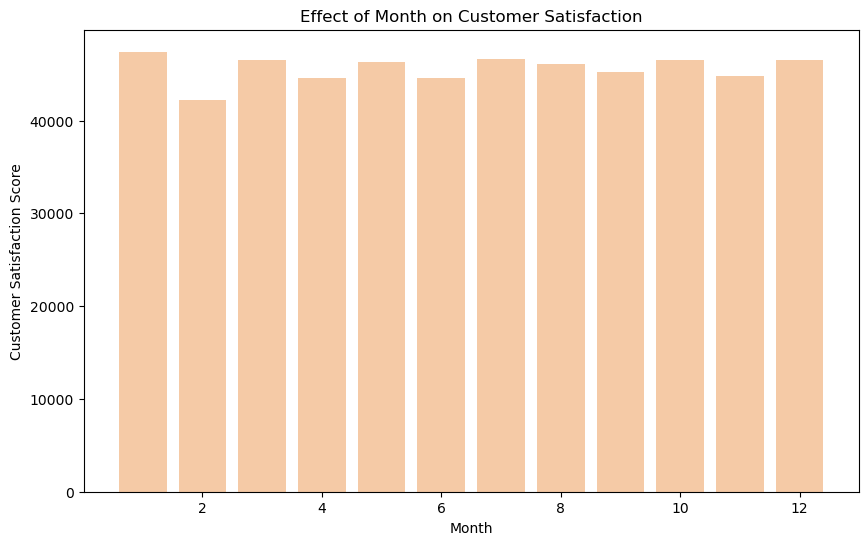

In [69]:
##satisfaction by month
monthGroup = filtTravelDF.groupby('Month')['Customer Satisfaction Score'].size()

plt.figure(figsize=(10, 6))
plt.bar(monthGroup.index, monthGroup, color= '#F5CAA6')

plt.xlabel('Month')
plt.ylabel('Customer Satisfaction Score')
plt.title('Effect of Month on Customer Satisfaction')

ChatGPT Citation for Below;

Prompt: How can I groups by age in a bar chart

Answer:

#Create bins for age groups
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
filtTravelDF['Age'] = pd.cut(filtTravelDF['Age'], bins=age_bins, labels=age_labels)

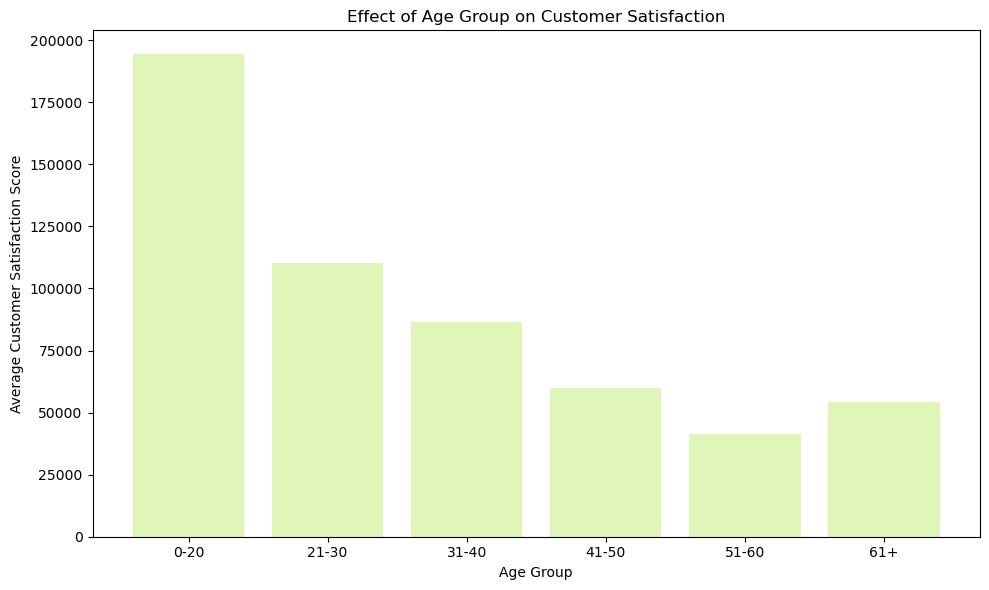

In [45]:
# Create bins for age groups
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
filtTravelDF['Age'] = pd.cut(filtTravelDF['Age'], bins=age_bins, labels=age_labels)

ageGroup = filtTravelDF.groupby('Age')['Customer Satisfaction Score'].size()

plt.figure(figsize=(10, 6))
plt.bar(ageGroup.index, ageGroup, color='#E0F5B8')

plt.xlabel('Age')
plt.ylabel('Customer Satisfaction Score')
plt.title('Effect of Age on Customer Satisfaction')
plt.tight_layout()